In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/DL Project/Military.zip"
extract_to = "/content/drive/MyDrive/DL Project/Military"

# Create the extraction folder if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Unzip using Python
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [ ]:
import zipfile
import os
zip_path = "/content/drive/MyDrive/DL Project/Military.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()
    print("Total files in ZIP:", len(zip_contents))

Total files in ZIP: 52632


In [ ]:
import zipfile
import os

extracted_files = []
for root, dirs, files in os.walk(extract_to):
    for file in files:
        extracted_files.append(os.path.join(root, file))

print("Total extracted files:", len(extracted_files))


NameError: name 'extract_to' is not defined

In [ ]:
import zipfile
import os

if len(zip_contents) == len(extracted_files):
    print("✅ All files successfully extracted!")
else:
    print("⚠️ Some files might be missing!")
    print(f"{len(extracted_files)} out of {len(zip_contents)} files extracted.")


✅ All files successfully extracted!


In [ ]:
pip install ultralytics opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

# Step 1: Create data.yaml

In [ ]:
yaml_content = """
train: /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images
val: /content/drive/MyDrive/DL Project/Military/military_object_dataset/val/images

nc: 3
names: [
  'camouflage_soldier', 'soldier', 'military_aircraft'
]
"""


with open("/content/drive/MyDrive/DL Project/Military/military_object_dataset/military_dataset.yaml", "w") as f:
    f.write(yaml_content.strip())

In [ ]:
import os

# Paths to your label folders
train_cache = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/labels.cache'
val_cache = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/val/labels.cache'

# Delete if exists
for path in [train_cache, val_cache]:
    if os.path.exists(path):
        os.remove(path)
        print(f"Deleted: {path}")
    else:
        print(f"No cache file found at: {path}")

Deleted: /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/labels.cache
Deleted: /content/drive/MyDrive/DL Project/Military/military_object_dataset/val/labels.cache


# 1. Set the image directory path

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Paths to your training and validation image folders
train_path = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images'
val_path = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/val/images'

# 2. Analyze image dimensions

In [ ]:
from collections import Counter
import numpy as np

def get_image_sizes(img_folder):
    widths = []
    heights = []
    image_shapes = []

    for img_name in os.listdir(img_folder):
        if img_name.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(img_folder, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]
                widths.append(w)
                heights.append(h)
                image_shapes.append((w, h))
    return widths, heights, image_shapes

# Analyze both train and val sets
train_widths, train_heights, train_shapes = get_image_sizes(train_path)
val_widths, val_heights, val_shapes = get_image_sizes(val_path)

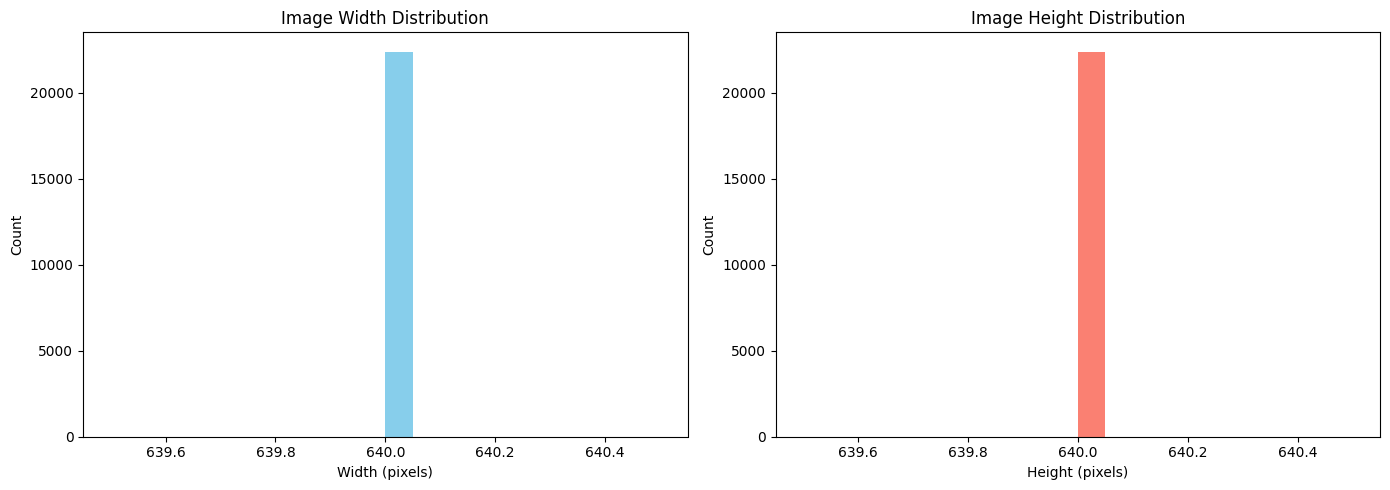

In [ ]:
# Plot histogram of widths and heights
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].hist(train_widths + val_widths, bins=20, color='skyblue')
axs[0].set_title("Image Width Distribution")
axs[0].set_xlabel("Width (pixels)")
axs[0].set_ylabel("Count")

axs[1].hist(train_heights + val_heights, bins=20, color='salmon')
axs[1].set_title("Image Height Distribution")
axs[1].set_xlabel("Height (pixels)")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

 # Identify resolution outliers

In [ ]:
# Thresholds (you can adjust)
min_dim = 200
max_dim = 2000

print("\n🔍 Checking for size outliers (width or height too small or large):")
for dataset_name, shapes, folder in [('Train', train_shapes, train_path), ('Val', val_shapes, val_path)]:
    outliers = [name for name, (w, h) in zip(os.listdir(folder), shapes)
                if w < min_dim or h < min_dim or w > max_dim or h > max_dim]

    if outliers:
        print(f"📌 {dataset_name} set: Found {len(outliers)} outlier images:")
        for name in outliers[:5]:
            print(f" - {name}")
        if len(outliers) > 5:
            print(f"   ...and {len(outliers) - 5} more.")
    else:
        print(f"✅ {dataset_name} set: No outliers found.")


🔍 Checking for size outliers (width or height too small or large):
✅ Train set: No outliers found.
✅ Val set: No outliers found.


These resolution outliers may:

Lead to inconsistent feature extraction

Slow down training

Result in poor or unstable model performance

YOLOv8 expects all images to be resized to the same resolution (default: 640x640) during training — but outliers can still create issues with bounding boxes, memory use, or generalization.

## Resize all images to 640×640

In [ ]:
import os
import cv2

def resize_images(folder, size=(640, 640), overwrite=True):
    for img_name in os.listdir(folder):
        if img_name.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                resized = cv2.resize(img, size)
                cv2.imwrite(img_path, resized)

# Run resizing (in-place on original images)
resize_images('/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images')
resize_images('/content/drive/MyDrive/DL Project/Military/military_object_dataset/val/images')

In [ ]:
import os

for cache_path in [
    '/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/labels.cache',
    '/content/drive/MyDrive/DL Project/Military/military_object_dataset/val/labels.cache'
]:
    if os.path.exists(cache_path):
        os.remove(cache_path)
        print(f"Deleted: {cache_path}")

# Again Rerun

In [ ]:
def get_image_sizes(img_folder):
    widths = []
    heights = []
    image_shapes = []

    for img_name in os.listdir(img_folder):
        if img_name.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(img_folder, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]
                widths.append(w)
                heights.append(h)
                image_shapes.append((w, h))
    return widths, heights, image_shapes

# ✅ RE-RUN THIS to get fresh data after any resizing
train_widths, train_heights, train_shapes = get_image_sizes(train_path)
val_widths, val_heights, val_shapes = get_image_sizes(val_path)

# Check again for outliers

In [ ]:
# Check again for outliers
min_dim = 200
max_dim = 2000

for dataset_name, shapes, folder in [('Train', train_shapes, train_path), ('Val', val_shapes, val_path)]:
    outliers = [name for name, (w, h) in zip(os.listdir(folder), shapes)
                if w < min_dim or h < min_dim or w > max_dim or h > max_dim]

    if outliers:
        print(f"📌 {dataset_name} set: Found {len(outliers)} outlier images:")
        for name in outliers[:5]:
            print(f" - {name}")
        if len(outliers) > 5:
            print(f"   ...and {len(outliers) - 5} more.")
    else:
        print(f"✅ {dataset_name} set: No outliers found.")

✅ Train set: No outliers found.
✅ Val set: No outliers found.


#  Calculate aspect ratios of train and val images

In [ ]:
# Reuse the train_shapes and val_shapes lists from earlier

import numpy as np
import matplotlib.pyplot as plt

# Compute aspect ratios
train_aspect_ratios = [round(w / h, 2) for (w, h) in train_shapes if h != 0]
val_aspect_ratios = [round(w / h, 2) for (w, h) in val_shapes if h != 0]

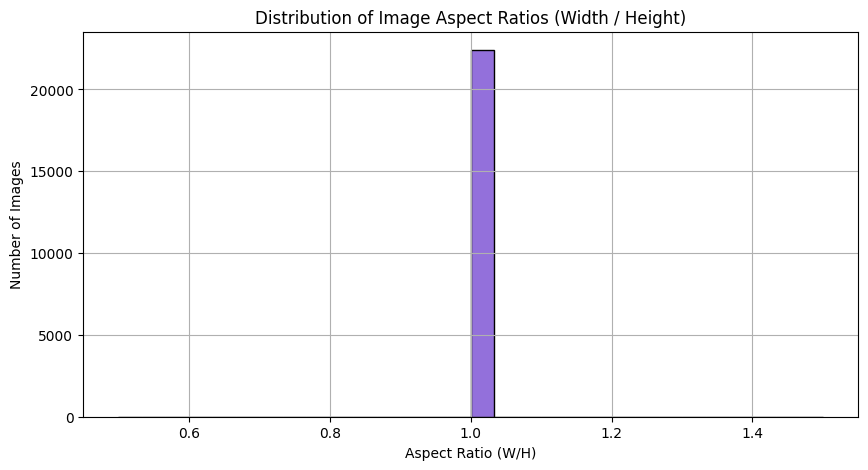

In [ ]:
# Combine for overall view
all_ratios = train_aspect_ratios + val_aspect_ratios

plt.figure(figsize=(10, 5))
plt.hist(all_ratios, bins=30, color='mediumpurple', edgecolor='black')
plt.title("Distribution of Image Aspect Ratios (Width / Height)")
plt.xlabel("Aspect Ratio (W/H)")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()

In [ ]:
# Check how many images are non-square

from collections import Counter

def ratio_stats(ratios, dataset_name):
    square = sum(1 for r in ratios if r == 1.0)
    wide = sum(1 for r in ratios if r > 1.0)
    tall = sum(1 for r in ratios if r < 1.0)

    print(f"\n📊 {dataset_name} Aspect Ratio Breakdown:")
    print(f"  Square (1.0):      {square}")
    print(f"  Landscape (>1.0):  {wide}")
    print(f"  Portrait (<1.0):   {tall}")

ratio_stats(train_aspect_ratios, "Train Set")
ratio_stats(val_aspect_ratios, "Val Set")


📊 Train Set Aspect Ratio Breakdown:
  Square (1.0):      19953
  Landscape (>1.0):  0
  Portrait (<1.0):   0

📊 Val Set Aspect Ratio Breakdown:
  Square (1.0):      2452
  Landscape (>1.0):  0
  Portrait (<1.0):   0


No need to crop or pad images — they're already in optimal shape for YOLOv8.

YOLOv8 expects square inputs (typically 640×640), so dataset is aligned with the model’s assumptions.

preprocessing pipeline is solid — clean aspect ratios help avoid model distortion or label misalignment.

# Image Quality Check

In [ ]:
#Setup

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths
train_path = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images'
val_path = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/val/images'

# Combine both datasets for a full quality scan
all_image_paths = [os.path.join(train_path, img) for img in os.listdir(train_path) if img.endswith(('.jpg', '.png'))]
all_image_paths += [os.path.join(val_path, img) for img in os.listdir(val_path) if img.endswith(('.jpg', '.png'))]

In [ ]:
# Blurriness Detection (Laplacian Variance)

def detect_blurriness(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

In [ ]:
# Exposure Score (brightness)

def calculate_brightness(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    brightness = hsv[..., 2].mean()
    return brightness

In [ ]:
# Noise Estimate (simple stddev)

def estimate_noise(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.std(gray)

In [ ]:
# Analyze and Visualize

blur_scores = []
brightness_scores = []
noise_scores = []
bad_images = []

for path in all_image_paths:
    img = cv2.imread(path)
    if img is None:
        continue

    blur = detect_blurriness(img)
    brightness = calculate_brightness(img)
    noise = estimate_noise(img)

    blur_scores.append((path, blur))
    brightness_scores.append((path, brightness))
    noise_scores.append((path, noise))

    # Threshold-based filtering (tweak if needed)
    if blur < 50 or brightness < 30 or brightness > 230:
        bad_images.append(path)

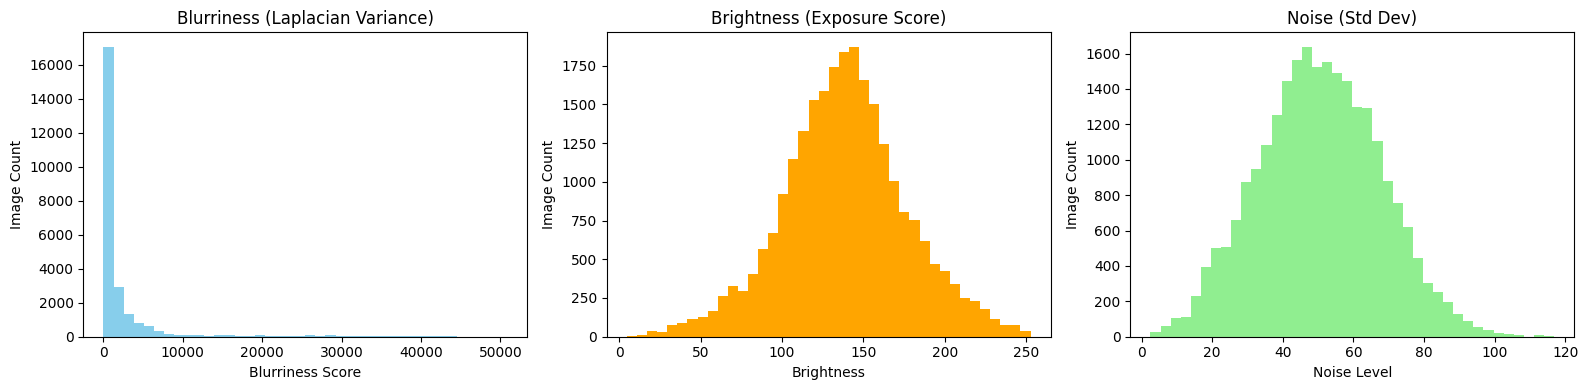

In [ ]:
# Helper to extract just the scores
def scores_only(pairs): return [score for _, score in pairs]

plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.hist(scores_only(blur_scores), bins=40, color='skyblue')
plt.title('Blurriness (Laplacian Variance)')
plt.xlabel('Blurriness Score')
plt.ylabel('Image Count')

plt.subplot(1, 3, 2)
plt.hist(scores_only(brightness_scores), bins=40, color='orange')
plt.title('Brightness (Exposure Score)')
plt.xlabel('Brightness')
plt.ylabel('Image Count')

plt.subplot(1, 3, 3)
plt.hist(scores_only(noise_scores), bins=40, color='lightgreen')
plt.title('Noise (Std Dev)')
plt.xlabel('Noise Level')
plt.ylabel('Image Count')

plt.tight_layout()
plt.show()

# Review Low-Quality Images

In [ ]:
print(f"\n❗ Found {len(bad_images)} potentially bad-quality images (blurry or poorly exposed):")
for img in bad_images[:10]:
    print(f" - {img}")
if len(bad_images) > 10:
    print(f"...and {len(bad_images) - 10} more.")


❗ Found 1968 potentially bad-quality images (blurry or poorly exposed):
 - /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/025194.jpg
 - /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/025206.jpg
 - /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/025214.jpg
 - /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/025224.jpg
 - /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/025228.jpg
 - /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/025237.jpg
 - /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/025246.jpg
 - /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/025253.jpg
 - /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/025255.jpg
 - /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/image

# Preview a Few Bad Images

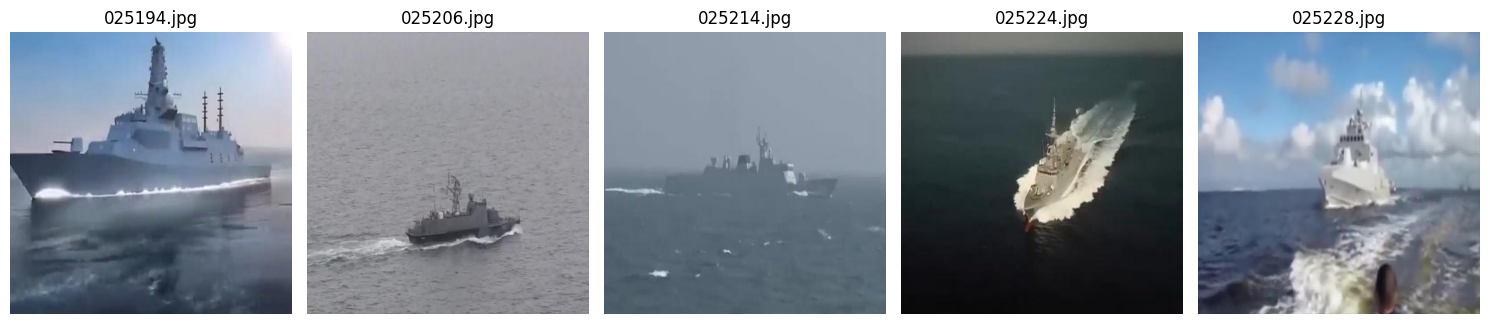

In [ ]:
#To visually inspect some flagged examples

import matplotlib.pyplot as plt

def show_images(image_paths, n=5):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:n]):
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img_rgb)
        plt.title(os.path.basename(img_path))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show first 5 bad-quality images
show_images(bad_images, n=5)


In [ ]:
# Automatically Delete Them

import os

for img_path in bad_images:
    try:
        os.remove(img_path)

        # Also delete the corresponding YOLO label (.txt)
        label_path = img_path.replace('/images/', '/labels/').rsplit('.', 1)[0] + '.txt'
        if os.path.exists(label_path):
            os.remove(label_path)

    except Exception as e:
        print(f"Failed to delete {img_path}: {e}")

print(f"✅ Deleted {len(bad_images)} low-quality images and their labels.")

✅ Deleted 1968 low-quality images and their labels.


# Annotation Analysis

In [ ]:
# Setup Paths
import os
import matplotlib.pyplot as plt

train_label_path = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/labels'
val_label_path   = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/val/labels'


# Count Annotations in Label Files

def count_annotations(label_folder):
    annotation_counts = {}
    no_annotation_files = []

    for file in os.listdir(label_folder):
        if file.endswith(".txt"):
            file_path = os.path.join(label_folder, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                count = len(lines)
                annotation_counts[file] = count

                if count == 0:
                    no_annotation_files.append(file)

    return annotation_counts, no_annotation_files

# Count for train and val
train_counts, train_no_ann = count_annotations(train_label_path)
val_counts, val_no_ann = count_annotations(val_label_path)

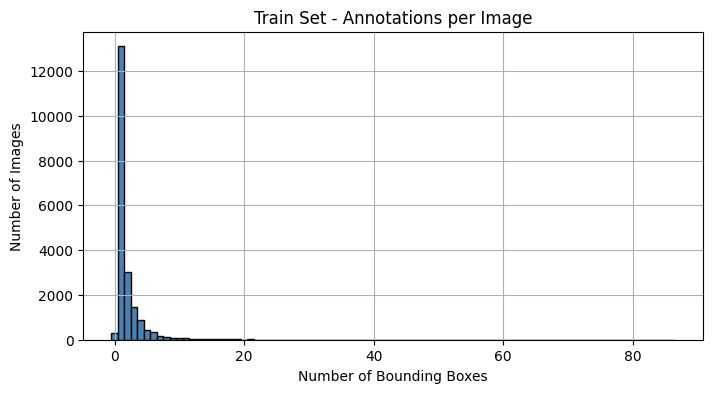

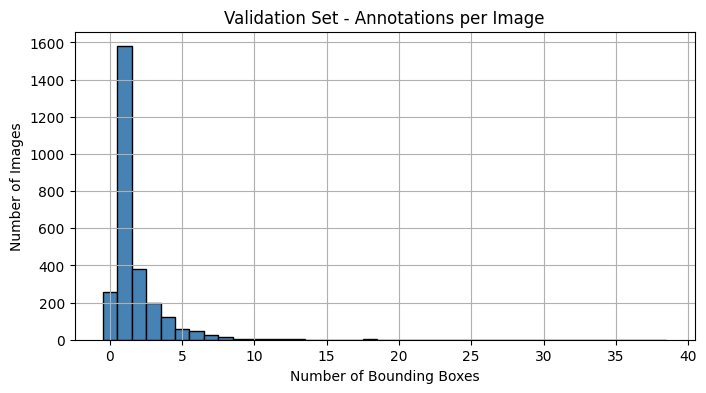

In [ ]:
def plot_annotation_distribution(counts_dict, dataset_name):
    counts = list(counts_dict.values())
    plt.figure(figsize=(8, 4))
    plt.hist(counts, bins=range(0, max(counts)+2), color='steelblue', edgecolor='black', align='left')
    plt.title(f'{dataset_name} - Annotations per Image')
    plt.xlabel('Number of Bounding Boxes')
    plt.ylabel('Number of Images')
    plt.grid(True)
    plt.show()

plot_annotation_distribution(train_counts, "Train Set")
plot_annotation_distribution(val_counts, "Validation Set")

In [ ]:
#Report Summary

print("📊 Summary:")
print(f"🟦 Train set: {len(train_counts)} images")
print(f"   - Images with no annotations: {len(train_no_ann)}")
print(f"🟪 Val set: {len(val_counts)} images")
print(f"   - Images with no annotations: {len(val_no_ann)}")

# Optional: Show example of zero-annotation files
if train_no_ann:
    print("\n⚠️ First few train images with NO annotations:")
    print(train_no_ann[:5])

📊 Summary:
🟦 Train set: 20242 images
   - Images with no annotations: 289
🟪 Val set: 2709 images
   - Images with no annotations: 257

⚠️ First few train images with NO annotations:
['018018.txt', '014652.txt', '014653.txt', '013097.txt', '012103.txt']


Train set: 1.4% with no labels — acceptable, but nee to remove them to keep the training clean.

Val set: 9.5% with no labels — a bit high. These will not contribute to validation metrics and could skew evaluation (YOLO might treat them as false positives if not handled carefully).

#Remove Images with No Annotations

In [ ]:
import os

def remove_empty_annotations(label_folder, image_folder, empty_files):
    removed = 0
    for label_file in empty_files:
        label_path = os.path.join(label_folder, label_file)
        image_name = label_file.rsplit('.', 1)[0] + '.jpg'
        image_path = os.path.join(image_folder, image_name)

        # Delete label file
        if os.path.exists(label_path):
            os.remove(label_path)

        # Delete corresponding image
        if os.path.exists(image_path):
            os.remove(image_path)
            removed += 1
        else:
            # In case image is .png
            image_name = label_file.rsplit('.', 1)[0] + '.png'
            image_path = os.path.join(image_folder, image_name)
            if os.path.exists(image_path):
                os.remove(image_path)
                removed += 1

    print(f"✅ Removed {removed} images and their empty label files from: {image_folder}")

# Define image folder paths
train_img_path = train_label_path.replace('/labels', '/images')
val_img_path = val_label_path.replace('/labels', '/images')

# Run deletion
remove_empty_annotations(train_label_path, train_img_path, train_no_ann)
remove_empty_annotations(val_label_path, val_img_path, val_no_ann)

✅ Removed 289 images and their empty label files from: /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images
✅ Removed 257 images and their empty label files from: /content/drive/MyDrive/DL Project/Military/military_object_dataset/val/images


# Bounding Box Size Distribution

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths
train_img_path = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images'
train_lbl_path = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/labels'
val_img_path   = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/val/images'
val_lbl_path   = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/val/labels'

In [ ]:
# Extract Bounding Box Sizes (normalized area)

def extract_box_sizes(img_folder, label_folder):
    box_areas = []

    for label_file in os.listdir(label_folder):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(label_folder, label_file)
        img_name = label_file.rsplit(".", 1)[0]

        # Try both jpg and png
        for ext in [".jpg", ".png"]:
            img_path = os.path.join(img_folder, img_name + ext)
            if os.path.exists(img_path):
                break
        else:
            continue  # image not found

        # Load image
        img = cv2.imread(img_path)
        if img is None:
            continue
        h_img, w_img = img.shape[:2]
        img_area = w_img * h_img

        # Parse label
        with open(label_path, 'r') as f:
            for line in f.readlines():
              parts = line.strip().split()
              if len(parts) < 5:
                continue

              # Only use the first 5 values in case extra columns exist
              try:
                _, x_center, y_center, w_rel, h_rel = map(float, parts[:5])
              except ValueError:
                continue  # skip invalid lines

              w_abs = w_rel * w_img
              h_abs = h_rel * h_img
              box_area = (w_abs * h_abs) / img_area
              box_areas.append(box_area)

    return box_areas

# Extract box sizes from both sets
train_box_areas = extract_box_sizes(train_img_path, train_lbl_path)
val_box_areas   = extract_box_sizes(val_img_path, val_lbl_path)

# bounding box aspect ratios

To understand if objects are mostly square, wide, or tall

To decide whether need to tweak anchor boxes for YOLO

Spot irregular or malformed annotations (like aspect ratios > 5 or < 0.1)







# Bounding Box Aspect Ratio Analysis


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_aspect_ratios(img_folder, label_folder):
    aspect_ratios = []

    for label_file in os.listdir(label_folder):
        if not label_file.endswith('.txt'):
            continue

        label_path = os.path.join(label_folder, label_file)
        img_name = os.path.splitext(label_file)[0]

        # Find matching image (jpg or png)
        for ext in ['.jpg', '.png']:
            img_path = os.path.join(img_folder, img_name + ext)
            if os.path.exists(img_path):
                break
        else:
            continue  # Image not found

        # Get image shape
        img = cv2.imread(img_path)
        if img is None:
            continue
        h_img, w_img = img.shape[:2]

        with open(label_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) < 5:
                    continue
                try:
                    _, x_center, y_center, w_rel, h_rel = map(float, parts[:5])
                except ValueError:
                    continue

                # Absolute width and height
                w_abs = w_rel * w_img
                h_abs = h_rel * h_img

                # Avoid division by zero
                if h_abs > 0:
                    aspect_ratio = w_abs / h_abs
                    aspect_ratios.append(aspect_ratio)

    return aspect_ratios

# class distribution analysis

In [ ]:
CLASS_NAMES = ['camouflage_soldier', 'soldier', 'military_aircraft']
NUM_CLASSES = len(CLASS_NAMES)

## Class Frequency & Co-occurrence Analysis

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import seaborn as sns

def analyze_class_distribution(label_folder, class_names):
    class_counter = Counter()
    co_occurrence = defaultdict(set)  # {image: set(classes)}

    for label_file in os.listdir(label_folder):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(label_folder, label_file)
        img_classes = set()

        with open(label_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) < 1:
                    continue
                try:
                    class_id = int(parts[0])
                except ValueError:
                    continue

                if 0 <= class_id < len(class_names):
                    class_counter[class_id] += 1
                    img_classes.add(class_id)

        for c1 in img_classes:
            for c2 in img_classes:
                if c1 != c2:
                    co_occurrence[(c1, c2)] = co_occurrence.get((c1, c2), 0) + 1

    return class_counter, co_occurrence

In [ ]:
# Run Analysis on Train and Val Sets

train_class_freq, train_cooccur = analyze_class_distribution(train_lbl_path, CLASS_NAMES)
val_class_freq, val_cooccur = analyze_class_distribution(val_lbl_path, CLASS_NAMES)


In [ ]:
# Plot Class Frequency

def plot_class_frequency(counter, class_names, dataset_name):
    counts = [counter.get(i, 0) for i in range(len(class_names))]
    plt.figure(figsize=(8, 4))
    sns.barplot(x=class_names, y=counts, palette="viridis")
    plt.title(f"{dataset_name} Class Frequency")
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.grid(True, axis='y')
    plt.show()

/tmp/ipython-input-3960114931.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=counts, palette="viridis")


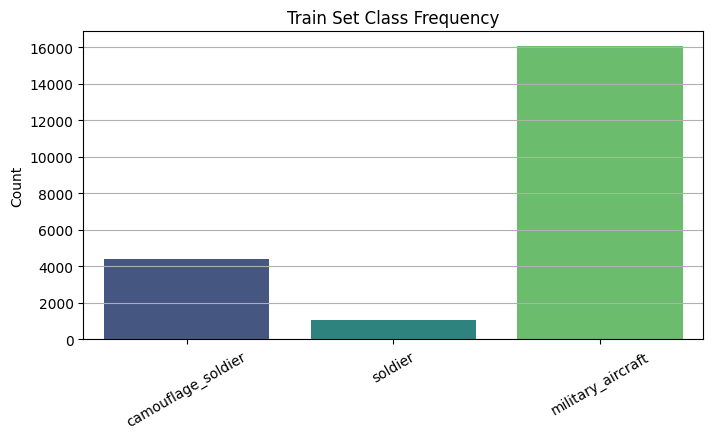

/tmp/ipython-input-3960114931.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=counts, palette="viridis")


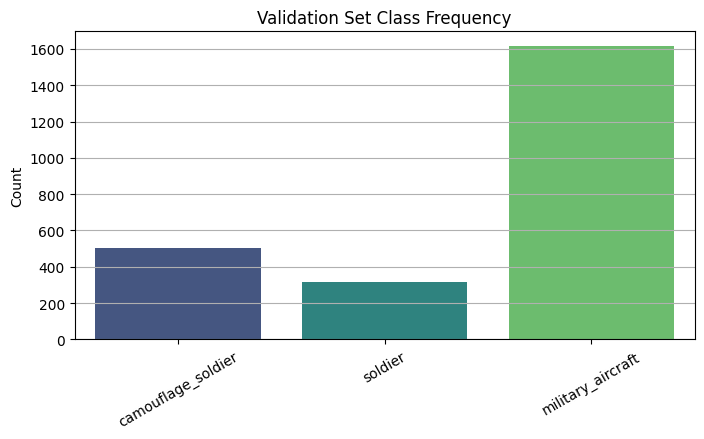

In [ ]:
plot_class_frequency(train_class_freq, CLASS_NAMES, "Train Set")
plot_class_frequency(val_class_freq, CLASS_NAMES, "Validation Set")

In [ ]:
#Plot Class Co-occurrence Matrix

def plot_co_occurrence_matrix(co_occur_dict, class_names, dataset_name):
    matrix = np.zeros((len(class_names), len(class_names)))

    for (c1, c2), count in co_occur_dict.items():
        matrix[c1, c2] += count

    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu", annot=True, fmt=".0f")
    plt.title(f"{dataset_name} Class Co-occurrence Matrix")
    plt.xlabel("Class")
    plt.ylabel("Co-occurs With")
    plt.show()

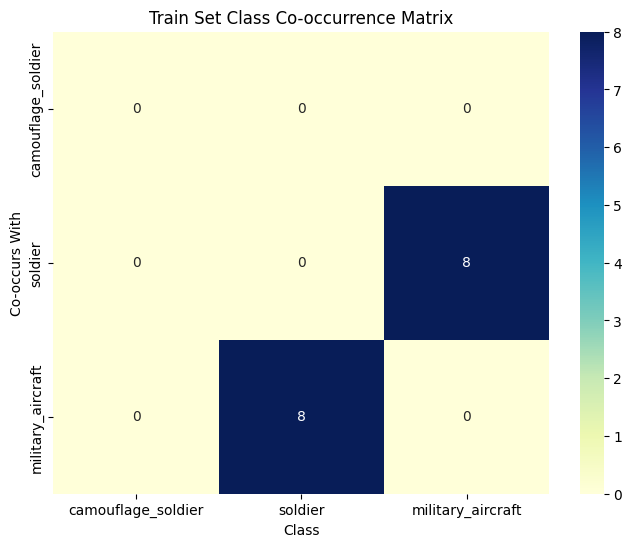

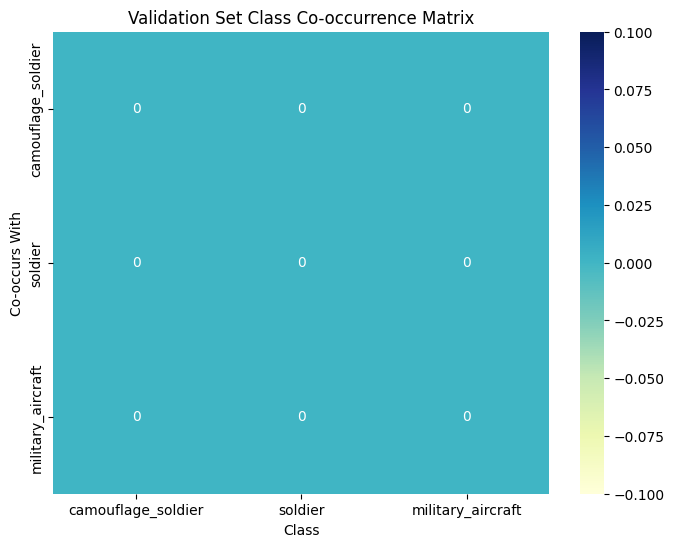

In [ ]:
plot_co_occurrence_matrix(train_cooccur, CLASS_NAMES, "Train Set")
plot_co_occurrence_matrix(val_cooccur, CLASS_NAMES, "Validation Set")

# Visualization


In [ ]:
# Sample Images with Annotations

import cv2
import random
import matplotlib.pyplot as plt

def visualize_annotated_samples(img_folder, label_folder, class_names, num_samples=5):
    import traceback
    image_files = [f for f in os.listdir(img_folder) if f.endswith(('.jpg', '.png'))]
    sampled_files = random.sample(image_files, num_samples)

    for img_file in sampled_files:
        img_path = os.path.join(img_folder, img_file)
        label_path = os.path.join(label_folder, os.path.splitext(img_file)[0] + ".txt")

        img = cv2.imread(img_path)
        if img is None:
            print(f"Image not found or unreadable: {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h_img, w_img = img.shape[:2]

        # Draw boxes
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line_num, line in enumerate(f, 1):
                    parts = line.strip().split()
                    if len(parts) < 5:
                        # Skip lines with insufficient data but print a warning
                        print(f"Warning: Skipping invalid line {line_num} in {label_path}: '{line.strip()}'")
                        continue
                    try:
                        cls, xc, yc, w, h = map(float, parts[:5])
                        cls = int(cls)
                        if cls >= len(class_names) or cls < 0:
                            print(f"Warning: Invalid class index {cls} at line {line_num} in {label_path}")
                            continue
                    except Exception as e:
                        print(f"Error parsing line {line_num} in {label_path}: {e}")
                        continue

                    # Convert YOLO format to pixel coords
                    x1 = int((xc - w/2) * w_img)
                    y1 = int((yc - h/2) * h_img)
                    x2 = int((xc + w/2) * w_img)
                    y2 = int((yc + h/2) * h_img)

                    color = (0, 255, 0)
                    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                    cv2.putText(img, class_names[cls], (x1, max(0, y1 - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.title(img_file)
        plt.axis('off')
        plt.show()

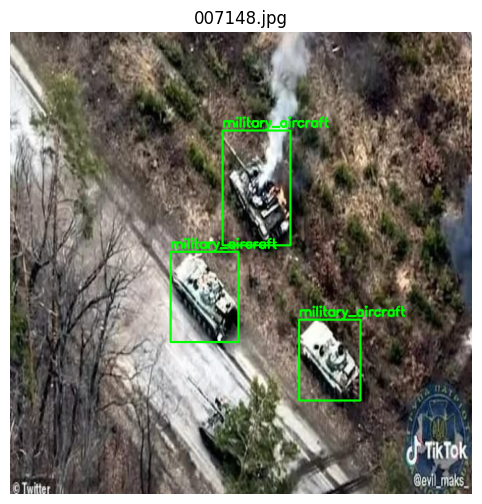

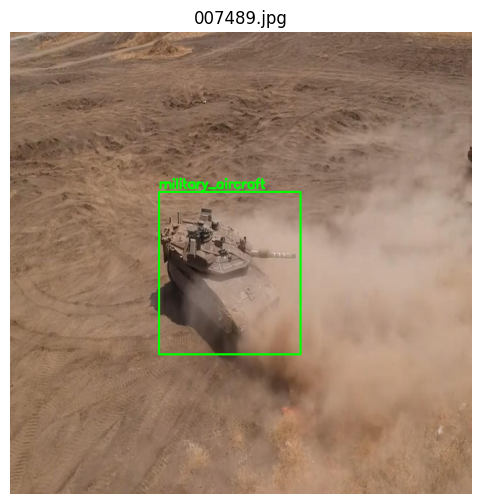

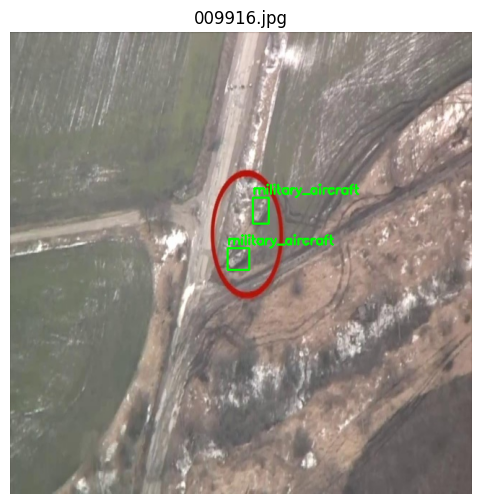

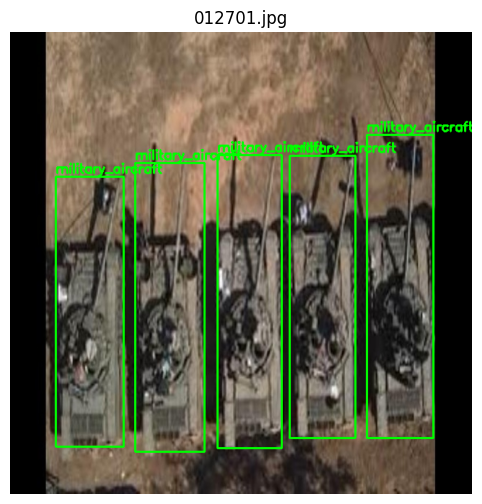

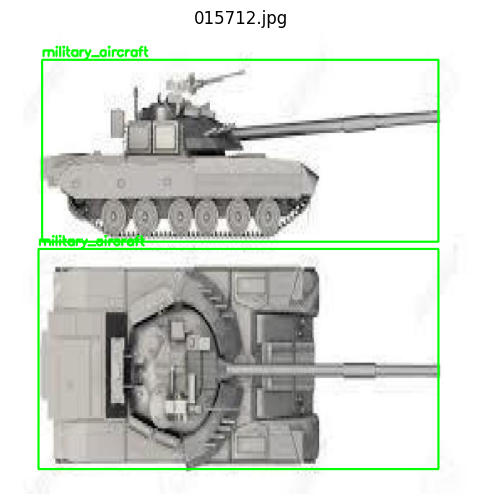

In [ ]:
visualize_annotated_samples(train_img_path, train_lbl_path, CLASS_NAMES, num_samples=5)


In [ ]:
# Heatmaps: Object Location Density

import numpy as np
import seaborn as sns

def create_object_heatmap(img_folder, label_folder, grid_size=(20, 20), max_images=2000):
    heatmap = np.zeros(grid_size)
    count = 0

    for label_file in os.listdir(label_folder):
        if not label_file.endswith(".txt"):
            continue
        label_path = os.path.join(label_folder, label_file)

        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 5:
                    continue
                try:
                    _, x_center, y_center, _, _ = map(float, parts[:5])
                except:
                    continue

                # Map normalized center to grid
                row = min(int(y_center * grid_size[0]), grid_size[0] - 1)
                col = min(int(x_center * grid_size[1]), grid_size[1] - 1)
                heatmap[row, col] += 1
        count += 1
        if count >= max_images:
            break

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap, cmap="hot", cbar=True)
    plt.title("Object Location Heatmap")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.show()

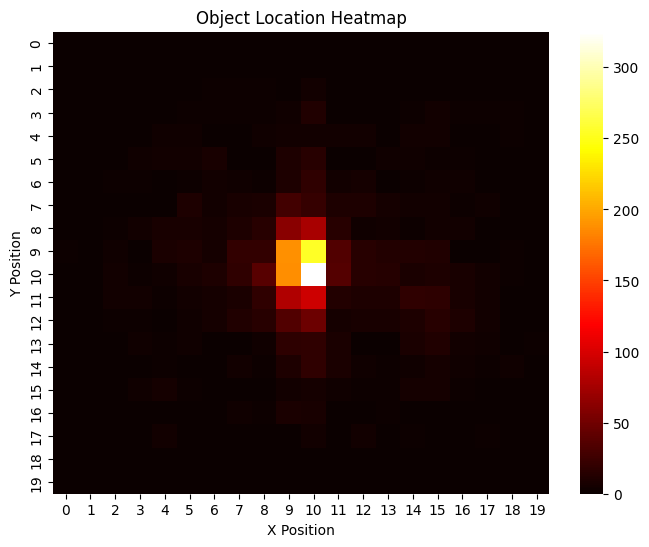

In [ ]:
create_object_heatmap(train_img_path, train_lbl_path)

In [ ]:
# Class-wise Bounding Box Size Distribution

from collections import defaultdict

def get_class_box_sizes(img_folder, label_folder, class_names):
    class_boxes = defaultdict(list)

    for label_file in os.listdir(label_folder):
        if not label_file.endswith(".txt"):
            continue
        label_path = os.path.join(label_folder, label_file)
        img_name = os.path.splitext(label_file)[0]

        for ext in [".jpg", ".png"]:
            img_path = os.path.join(img_folder, img_name + ext)
            if os.path.exists(img_path):
                break
        else:
            continue

        img = cv2.imread(img_path)
        if img is None:
            continue
        h_img, w_img = img.shape[:2]
        img_area = w_img * h_img

        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 5:
                    continue
                try:
                    cls, _, _, w, h = map(float, parts[:5])
                    cls = int(cls)
                except:
                    continue

                abs_area = (w * w_img) * (h * h_img)
                norm_area = abs_area / img_area
                class_boxes[cls].append(norm_area)

    return class_boxes

In [ ]:
def plot_box_size_by_class(class_boxes, class_names):
    plt.figure(figsize=(10, 6))
    data = [class_boxes[i] for i in range(len(class_names))]
    plt.boxplot(data, labels=class_names, showfliers=False)
    plt.title("Class-wise Bounding Box Area Distribution (normalized)")
    plt.ylabel("Normalized Area")
    plt.xticks(rotation=30)
    plt.grid(True)
    plt.show()

/tmp/ipython-input-552598615.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=class_names, showfliers=False)


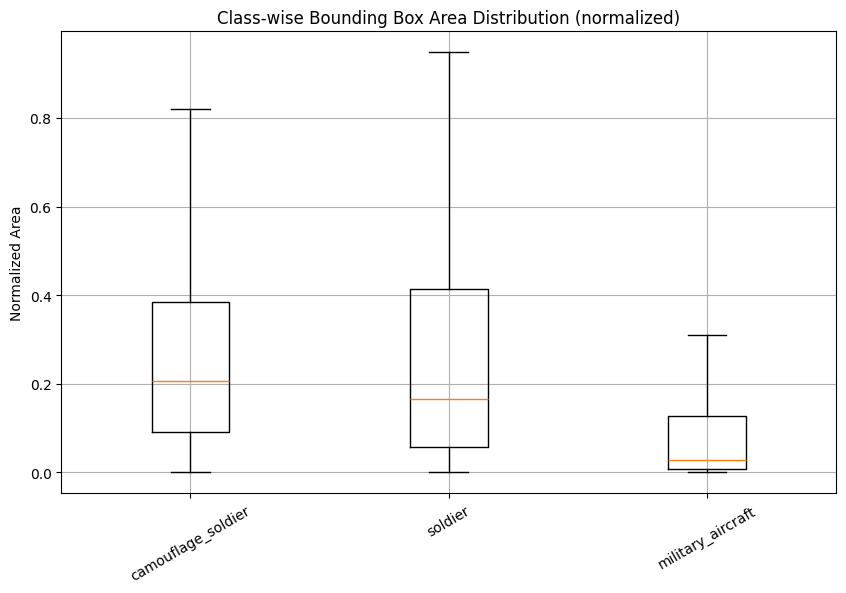

In [ ]:
class_boxes = get_class_box_sizes(train_img_path, train_lbl_path, CLASS_NAMES)
plot_box_size_by_class(class_boxes, CLASS_NAMES)

# **Test_train** data split - did not run

In [ ]:
import os
from collections import Counter

def analyze_split(label_dir, class_names):
    total_images = 0
    total_labels = 0
    class_counts = Counter()

    for file in os.listdir(label_dir):
        if file.endswith('.txt'):
            total_images += 1
            with open(os.path.join(label_dir, file)) as f:
                lines = f.readlines()
                total_labels += len(lines)
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) >= 1:
                        cls = int(parts[0])
                        class_counts[cls] += 1

    print(f"🖼️ Total images: {total_images}")
    print(f"🏷️ Total annotations: {total_labels}")
    print("📊 Class distribution:")
    for cls_id, count in sorted(class_counts.items()):
        class_name = class_names[cls_id] if cls_id < len(class_names) else f"Unknown({cls_id})"
        print(f" - {class_name} ({cls_id}): {count} annotations")


# Example usage
CLASS_NAMES = [
  'camouflage_soldier', 'weapon', 'military_tank', 'military_truck', 'military_vehicle',
  'civilian', 'soldier', 'civilian_vehicle', 'military_artillery', 'trench',
  'military_aircraft', 'military_warship'
]

print("\n🔍 Train Set:")
analyze_split('/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/labels', CLASS_NAMES)

print("\n🔍 Val Set:")
analyze_split('/content/drive/MyDrive/DL Project/Military/military_object_dataset/val/labels', CLASS_NAMES)


#Data Augmentation Analysis

In [ ]:
pip install albumentations

# Visualize Augmentations and Annotations

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import albumentations as A

# Source: original dataset
sample_img_dir = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images'
sample_lbl_dir = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/labels'

# Target: where to save augmented data
aug_img_dir = '/content/drive/MyDrive/DL Project/Military/augmented_dataset/train/images'
aug_lbl_dir = '/content/drive/MyDrive/DL Project/Military/augmented_dataset/train/labels'
os.makedirs(aug_img_dir, exist_ok=True)
os.makedirs(aug_lbl_dir, exist_ok=True)

# Define augmentations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.Rotate(limit=25, p=0.5),
    A.RandomScale(scale_limit=0.2, p=0.5),
    A.Blur(p=0.1)
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

def load_yolo_labels(label_path):
    boxes = []
    class_labels = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                try:
                    cls = int(parts[0])
                    box = list(map(float, parts[1:5]))
                    boxes.append(box)
                    class_labels.append(cls)
                except:
                    continue
    return boxes, class_labels

def augment_and_save(img_path, label_path, count):
    image = cv2.imread(img_path)
    if image is None:
        return

    h, w = image.shape[:2]
    boxes, class_labels = load_yolo_labels(label_path)

    if len(boxes) == 0:
        return

    try:
        augmented = transform(image=image, bboxes=boxes, class_labels=class_labels)
    except:
        return

    aug_img = augmented['image']
    aug_boxes = augmented['bboxes']
    aug_labels = augmented['class_labels']

    if len(aug_boxes) == 0:
        return  # Skip if all boxes are lost in augmentation

    # Save augmented image
    base_name = os.path.basename(img_path)
    aug_img_name = f"aug_{count}_{base_name}"
    aug_img_path = os.path.join(aug_img_dir, aug_img_name)
    cv2.imwrite(aug_img_path, aug_img)

    # Save augmented label
    aug_lbl_name = aug_img_name.rsplit('.', 1)[0] + '.txt'
    aug_lbl_path = os.path.join(aug_lbl_dir, aug_lbl_name)
    with open(aug_lbl_path, 'w') as f:
        for cls, box in zip(aug_labels, aug_boxes):
            line = f"{cls} {' '.join(f'{x:.6f}' for x in box)}"
            f.write(line + '\n')

    print(f"✅ Saved {aug_img_name}")

# Select sample images to augment
sample_files = [f for f in os.listdir(sample_img_dir) if f.endswith(('.jpg', '.png'))][:10]

for idx, file in enumerate(sample_files):
    img_path = os.path.join(sample_img_dir, file)
    lbl_path = os.path.join(sample_lbl_dir, file.rsplit('.', 1)[0] + '.txt')
    augment_and_save(img_path, lbl_path, idx)

✅ Saved aug_0_001887.jpg
✅ Saved aug_1_001888.jpg
✅ Saved aug_2_001901.jpg
✅ Saved aug_3_001902.jpg
✅ Saved aug_4_001904.jpg
✅ Saved aug_5_001903.jpg
✅ Saved aug_6_001906.jpg
✅ Saved aug_7_001905.jpg
✅ Saved aug_8_001911.jpg
✅ Saved aug_9_001912.jpg


In [ ]:
def check_small_objects(label_folder, img_folder, small_threshold=0.01):
    small_count = 0
    total_boxes = 0

    for fname in os.listdir(label_folder):
        if not fname.endswith('.txt'):
            continue

        image_name = fname.rsplit('.', 1)[0]
        image_path = None
        for ext in [".jpg", ".png"]:
            if os.path.exists(os.path.join(img_folder, image_name + ext)):
                image_path = os.path.join(img_folder, image_name + ext)
                break

        if image_path is None:
            continue

        img = cv2.imread(image_path)
        if img is None:
            continue
        h, w = img.shape[:2]
        img_area = h * w

        with open(os.path.join(label_folder, fname)) as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    try:
                        _, x_center, y_center, bw, bh = map(float, parts[:5])
                        box_area = (bw * w) * (bh * h)
                        total_boxes += 1
                        if box_area / img_area < small_threshold:
                            small_count += 1
                    except:
                        continue

    print(f"🔍 Total boxes: {total_boxes}")
    print(f"🐜 Small boxes (<{small_threshold*100:.1f}% of image): {small_count} ({(small_count / total_boxes) * 100:.2f}%)")

In [ ]:
from collections import Counter

def get_class_distribution(label_dir):
    class_counts = Counter()
    for file in os.listdir(label_dir):
        if file.endswith('.txt'):
            with open(os.path.join(label_dir, file)) as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 1:
                        try:
                            class_id = int(parts[0])
                            class_counts[class_id] += 1
                        except:
                            continue
    return class_counts

# Example usage
aug_class_counts = get_class_distribution('/content/drive/MyDrive/DL Project/Military/augmented_dataset')
for cls, count in sorted(aug_class_counts.items()):
    print(f"Class {cls}: {count}")

In [ ]:
# Annotation Quality Check

# Choose one example from your augmented dataset
aug_img_dir = '/content/drive/MyDrive/DL Project/Military/augmented_dataset/train/images'
aug_lbl_dir = '/content/drive/MyDrive/DL Project/Military/augmented_dataset/train/labels'

# Get a sample file
sample_file = os.listdir(aug_img_dir)[0]  # First augmented image

# Define full paths
image_path = os.path.join(aug_img_dir, sample_file)
label_path = os.path.join(aug_lbl_dir, sample_file.rsplit('.', 1)[0] + '.txt')

# Now run your visualization function
visualize_augmentation(image_path, label_path)

ValueError: invalid literal for int() with base 10: '0.0'

In [ ]:


#Testing whether I got red box aroung the object
import os
import cv2
import matplotlib.pyplot as plt
import albumentations as A

# Path to a few sample images and their YOLO labels
sample_img_dir = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images'
sample_lbl_dir = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/train/labels'

# Choose sample image(s) to visualize
sample_files = [f for f in os.listdir(sample_img_dir) if f.endswith('.jpg') or f.endswith('.png')][:5]

# Define augmentations to test
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.Rotate(limit=25, p=0.5),
    A.RandomScale(scale_limit=0.2, p=0.5),
    A.Blur(p=0.1)
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

def load_yolo_labels(label_path):
    boxes = []
    class_labels = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                cls = int(parts[0])
                box = list(map(float, parts[1:5]))
                boxes.append(box)
                class_labels.append(cls)
    return boxes, class_labels

def visualize_augmentation(img_path, label_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w = image.shape[:2]

    boxes, class_labels = load_yolo_labels(label_path)

    # Albumentations expects bbox in format [x_center, y_center, width, height] normalized (YOLO format)
    augmented = transform(image=image, bboxes=boxes, class_labels=class_labels)

    # Draw augmented image with bounding boxes
    aug_img = augmented['image']
    aug_boxes = augmented['bboxes']
    aug_labels = augmented['class_labels']

    for box in aug_boxes:
        x_c, y_c, bw, bh = box
        x1 = int((x_c - bw / 2) * w)
        y1 = int((y_c - bh / 2) * h)
        x2 = int((x_c + bw / 2) * w)
        y2 = int((y_c + bh / 2) * h)
        cv2.rectangle(aug_img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(aug_img)
    plt.title("Augmented Image with Boxes")
    plt.axis('off')
    plt.show()

# Run on sample files
for file in sample_files:
    img_path = os.path.join(sample_img_dir, file)
    lbl_path = os.path.join(sample_lbl_dir, file.rsplit('.', 1)[0] + '.txt')
    visualize_augmentation(img_path, lbl_path)

Output hidden; open in https://colab.research.google.com to view.

# Model Building - YOLOv8

In [2]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [3]:
# Load a pretrained YOLOv8 model - choose 's', 'm', 'l', or 'x' based on available resources
# Step 2: Import and load YOLO model
from ultralytics import YOLO

# Load YOLOv8 Small (you can also try yolov8n.pt for even faster CPU training)
model = YOLO('/content/drive/MyDrive/yolov8_runs/military_yolov8_cpu_run2/weights/last.pt')  # 'yolov8n.pt' = nano, fastest on CPU


#model.train(
#    data='/content/drive/MyDrive/DL Project/Military/military_object_dataset/military_dataset.yaml',  # path to your YAML
#    epochs=30,             # reduce for faster CPU runs
#    imgsz=640,             # image size (640 is a good balance)
#    batch=8,               # lower batch size for CPU memor
#    device=0,          # IMPORTANT: use CPU explicitly
#    workers=2,             # reduce worker threads
#    verbose=True,
#    save=True,
#    save_period=1,
#    project='/content/drive/MyDrive/yolov8_runs',
#    name='military_yolov8_cpu_run2',
#    exist_ok=True # allow reusing existing folder
#  )

#Start Training on CPU

model.train(
    data='/content/drive/MyDrive/DL Project/Military/military_object_dataset/military_dataset.yaml',
    epochs=1,             # keep low for CPU
    imgsz=640,             # reduce image size for faster runs
    batch=2,
    device='cpu',
    workers=1,
    verbose=True,
    save=True,
    save_period=1,
    project='/content/drive/MyDrive/yolov8_runs',
    name='military_yolov8_cpu_run2',
    exist_ok=True # allow reusing existing folder
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/DL Project/Military/military_object_dataset/military_dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, i


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    751897  ultralytics.nn.modules.head.Detect           [3, [64, 128, 256]]           
Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 373.6±206.8 ms, read: 0.1±0.0 MB/s, size: 132.5 KB)


train: Scanning /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/labels.cache... 19953 images, 0 backgrounds, 9237 corrupt: 100%|██████████| 19953/19953 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
train: /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/019020.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 3. Possible class labels are 0-2
train: /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/019021.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 3. Possible class labels are 0-2
train: /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/019023.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 3. Possible class labels are 0-2
train: /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/019024.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 3. Possible class labels are 0-2
train: /content/drive/MyDrive/DL Project/Military/military_object_dataset/train/images/019025.jpg: ignoring corrupt image/label: 

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 8.0±16.4 ms, read: 0.5±0.3 MB/s, size: 157.5 KB)


val: Scanning /content/drive/MyDrive/DL Project/Military/military_object_dataset/val/labels.cache... 2452 images, 0 backgrounds, 1215 corrupt: 100%|██████████| 2452/2452 [00:00<?, ?it/s]

val: /content/drive/MyDrive/DL Project/Military/military_object_dataset/val/images/005399.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 3. Possible class labels are 0-2
val: /content/drive/MyDrive/DL Project/Military/military_object_dataset/val/images/005400.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 3. Possible class labels are 0-2
val: /content/drive/MyDrive/DL Project/Military/military_object_dataset/val/images/005401.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 3. Possible class labels are 0-2
val: /content/drive/MyDrive/DL Project/Military/military_object_dataset/val/images/005402.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 3. Possible class labels are 0-2
val: /content/drive/MyDrive/DL Project/Military/military_object_dataset/val/images/005403.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 3. Possible class labels are 0-2


Plotting labels to /content/drive/MyDrive/yolov8_runs/military_yolov8_cpu_run2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/yolov8_runs/military_yolov8_cpu_run2
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.282      1.285      1.533          3        640: 100%|██████████| 5358/5358 [4:02:48<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [17:20<00:00,  3.36s/it]


                   all       1237       2114      0.647        0.6      0.616      0.327

1 epochs completed in 4.337 hours.
Optimizer stripped from /content/drive/MyDrive/yolov8_runs/military_yolov8_cpu_run2/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/yolov8_runs/military_yolov8_cpu_run2/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/yolov8_runs/military_yolov8_cpu_run2/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [05:45<00:00,  1.11s/it]


                   all       1237       2114      0.644      0.601      0.616      0.327
    camouflage_soldier        381        504      0.707      0.472      0.592      0.278
               soldier        109        178      0.415      0.545       0.43      0.204
     military_aircraft        747       1432      0.811      0.787      0.824      0.499
Speed: 7.6ms preprocess, 254.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/drive/MyDrive/yolov8_runs/military_yolov8_cpu_run2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78ba7b1ca2d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [5]:
#Evaluate All Epochs and Select Best

import os
from ultralytics import YOLO

weights_dir = '/content/drive/MyDrive/yolov8_runs/military_yolov8_cpu_run2/weights/'
best_map = 0
best_epoch = None

for i in range(10):
    weight_path = os.path.join(weights_dir, f'epoch{i}.pt')
    model = YOLO(weight_path)
    metrics = model.val(
        data='/content/drive/MyDrive/DL Project/Military/military_object_dataset/military_dataset.yaml',
        device='cpu',
        imgsz=640,
        project='/content/drive/MyDrive/yolov8_runs',
        name='military_eval_run3',
        exist_ok=False,  # force new folder
        save=False       # skip saving images
    )
    current_map = metrics.box.map  # mAP@0.5
    print(f'Epoch {i}: mAP = {current_map:.4f}')

    if current_map > best_map:
        best_map = current_map
        best_epoch = i

print(f'\n✅ Best epoch: {best_epoch} with mAP: {best_map:.4f}')

Output hidden; open in https://colab.research.google.com to view.

 Overall Metrics:
Metric	Value	Meaning
Precision	0.644	64.4% of predicted boxes were correct
Recall	0.601	60.1% of all true objects were detected
mAP@0.5	0.616	Good — general detection accuracy at 50% IoU
mAP@0.5:0.95	0.327	Moderate — harder threshold, useful for fine tuning


Class-wise Insights:
Class	Precision	Recall	mAP@0.5	mAP@0.5:0.95
camouflage_soldier	0.707	0.472	0.592	0.278
soldier	0.415	0.545	0.430	0.204
military_aircraft	0.811	0.787	0.824	0.499

Aircraft is detected very well.

Camouflaged soldiers: high precision but low recall → missed some soldiers.

Regular soldiers: moderate results.

🔍 Suggests your dataset is skewed toward aircraft (1432 instances) — consider balancing if possible.

Use: content/drive/MyDrive/yolov8_runs/military_yolov8_cpu_run2/weights/epoch8.pt

Inference Speed
text
Copy
Edit
Speed: 4.4ms preprocess, 269.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Total per image = ~275ms ⇒ ~3.6 frames/sec

✅ Acceptable for CPU testing, but for real-time deployment, you'll want:

<100ms/frame on GPU or edge device

Possibly using YOLOv8n.pt or ONNX export + TensorRT for speedup

In [6]:
# Rename and save the best model

import shutil

# Define source and destination paths
source = '/content/drive/MyDrive/yolov8_runs/military_yolov8_cpu_run2/weights/epoch8.pt'
destination = '/content/drive/MyDrive/yolov8_runs/military_final_model.pt'

# Copy and rename
shutil.copy(source, destination)

print("✅ Model saved as military_final_model.pt")

✅ Model saved as military_final_model.pt


In [8]:
# Measure Inference Time

import time
from ultralytics import YOLO
from PIL import Image

# Load best model (after selecting)
model = YOLO('/content/drive/MyDrive/yolov8_runs/military_final_model.pt')  # or best.pt

# Load a test image
img = '/content/drive/MyDrive/DL Project/Military/military_object_dataset/test/images/000001.jpg'

# Warm-up run (optional)
model.predict(source=img, device='cpu')

# Measure inference time
start_time = time.time()
results = model.predict(source=img, device='cpu')
end_time = time.time()

inference_time = end_time - start_time
print(f'Inference Time: {inference_time:.3f} seconds')


image 1/1 /content/drive/MyDrive/DL Project/Military/military_object_dataset/test/images/000001.jpg: 640x640 2 camouflage_soldiers, 198.0ms
Speed: 3.6ms preprocess, 198.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DL Project/Military/military_object_dataset/test/images/000001.jpg: 640x640 2 camouflage_soldiers, 190.7ms
Speed: 3.1ms preprocess, 190.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Inference Time: 0.208 seconds


In [11]:

# Real-Time Detection (on images or video)

results = model.predict(
    source='/content/drive/MyDrive/DL Project/Military/military_object_dataset/test/images',
    conf=0.5,
    save=True,
    project='/content/drive/MyDrive/DL Project/Military/',
    name='predicted_images',
    stream=True
)

# Streamlit

In [13]:
!pip install streamlit streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [25]:

%%writefile MilitaryUI.py

import streamlit as st
from ultralytics import YOLO
from PIL import Image
import os
import numpy as np
import cv2


# Load your model
model = YOLO("/content/drive/MyDrive/yolov8_runs/military_final_model.pt")

# Define threat classes
threat_classes = ['camouflage_soldier', 'soldier', 'military_aircraft']
non_threat_classes = ['military_tank', 'military_truck','civilian']

def classify_threat(class_name):
    if class_name in threat_classes:
        return "Threat"
    else:
        return "Non-Threat"

st.title("Military Threat Detection")

# File upload
uploaded_file = st.file_uploader("Upload an image", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Load image
    img_pil = Image.open(uploaded_file).convert('RGB')
    img_np = np.array(img_pil)
    img_cv2 = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

    with st.spinner("Detecting..."):
        results = model.predict(img_cv2, conf=0.4)

        for result in results:
            for box in result.boxes:
                cls = int(box.cls[0])
                class_name = model.names[cls]
                conf = float(box.conf[0])
                threat_label = classify_threat(class_name)

                # Bounding box coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])

                # Color based on threat
                color = (0, 0, 255) if threat_label == "Threat" else (0, 255, 0)

                # Draw rectangle
                cv2.rectangle(img_cv2, (x1, y1), (x2, y2), color, 2)

                # Label with class + confidence + threat type
                label = f"{class_name} ({conf:.2f}) - {threat_label}"
                cv2.putText(img_cv2, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                            0.5, color, 2)

    # Convert back to RGB for Streamlit
    img_result = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
    st.image(img_result, caption="Detection Result", use_container_width=True)

Overwriting MilitaryUI.py


In [26]:
!wget -q -O - ipv4.icanhazip.com

35.185.74.123


In [ ]:
! streamlit run MilitaryUI.py & npx localtunnel --port 8501  # replace the file name accordingly

⠙

⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.185.74.123:8501

⠇⠏⠋⠙⠹⠸your url is: https://shaky-baths-matter.loca.lt

0: 640x640 2 camouflage_soldiers, 235.9ms
Speed: 8.7ms preprocess, 235.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
2025-08-08 11:34:21.682 The `use_column_width` parameter has been deprecated and will be removed in a future release. Please utilize the `use_container_width` parameter instead.

0: 640x640 1 camouflage_soldier, 207.8ms
Speed: 7.6ms preprocess, 207.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
2025-08-08 11:35:07.456 The `use_column_width` parameter has been deprecated and will be removed in a future release. Please utilize the `use_container_width` parameter instead.

0: 640x640 1 camouflage_soldier, 211.3ms
Speed: 5.9ms preprocess, 211.3ms inference, 1.2ms postprocess per image at shape (1,